<a href="https://colab.research.google.com/github/Naman-Coder-950/Image-Text-Editor/blob/main/Image_Text_Editor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!apt-get install tesseract-ocr -y
!pip install pytesseract pillow opencv-python matplotlib


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [7]:
from google.colab import files
uploaded = files.upload()

import cv2, pytesseract, numpy as np, os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Replace the filename below with your uploaded file’s name
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


Saving WhatsApp Image 2025-10-22 at 2.58.51 PM.jpeg to WhatsApp Image 2025-10-22 at 2.58.51 PM (1).jpeg


In [8]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
data = pytesseract.image_to_data(img_rgb, output_type=pytesseract.Output.DICT)

Found 2 match(es).


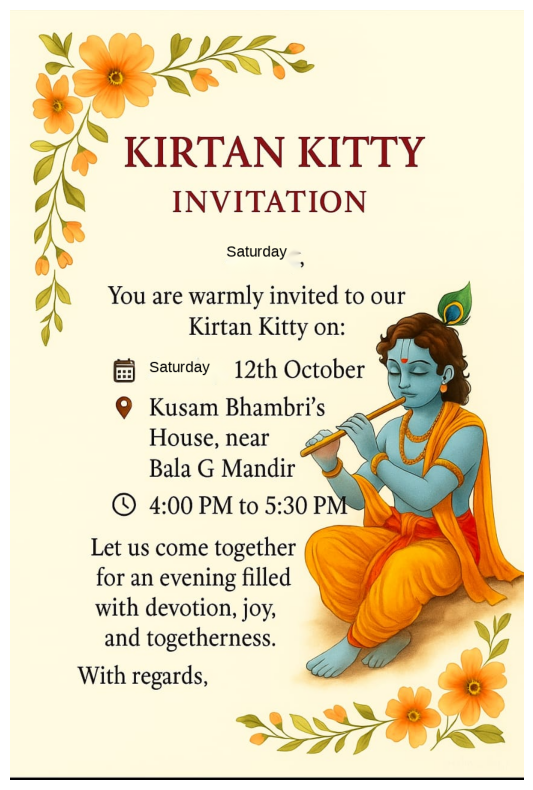

✅ Saved as edited_output.jpg


In [10]:
find_word = "Sunday"     # word you want to replace
replace_with = "Saturday"     # new text

target_boxes = []
for i, word in enumerate(data['text']):
    if word.strip() and find_word.lower() in word.lower():
        target_boxes.append({
            'left': data['left'][i],
            'top': data['top'][i],
            'w': data['width'][i],
            'h': data['height'][i]
        })

if not target_boxes:
    print("⚠️ No matching text found.")
else:
    print(f"Found {len(target_boxes)} match(es).")

    # Mask + inpaint
    mask = np.zeros(img_rgb.shape[:2], np.uint8)
    for b in target_boxes:
        cv2.rectangle(mask, (b['left'], b['top']),
                      (b['left']+b['w'], b['top']+b['h']), 255, -1)
    inpainted = cv2.inpaint(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR),
                            mask, 3, cv2.INPAINT_TELEA)
    inpainted = cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB)

    # Draw replacement text safely
    pil_img = Image.fromarray(inpainted)
    draw = ImageDraw.Draw(pil_img)

    # Robust font loader
    def load_font(size=25):
        font_paths = [
            "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf",
            "/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf",
            "/usr/share/fonts/truetype/freefont/FreeSans.ttf"
        ]
        for f in font_paths:
            if os.path.exists(f):
                return ImageFont.truetype(f, size)
        print("⚠️ System font missing, using default font.")
        return ImageFont.load_default()

    font = load_font()

    for b in target_boxes:
        x, y, w, h = b['left'], b['top'], b['w'], b['h']
        draw.text((x, y), replace_with, font=font, fill=(0, 0, 0))

    plt.figure(figsize=(10,10))
    plt.imshow(pil_img)
    plt.axis('off')
    plt.show()

    pil_img.save("edited_output.jpg")
    print("✅ Saved as edited_output.jpg")